In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('trains_train.csv')
test=pd.read_csv('trains_test.csv')

In [3]:
test.head(3)
train.shape, test.shape

((2250, 7), (1529, 6))

In [4]:
train.isnull().sum()

date          0
time          0
connection    0
from          0
to            0
vehicle       0
occupancy     0
dtype: int64

In [5]:
train.head()
test.head()

,date,time,connection,from,to,vehicle
0,2016-10-29,08:55:57 AM,8833209/20161029/IC2929,8833209,8821832,IC2929
1,2016-10-29,08:56:07 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
2,2016-10-29,09:14:01 AM,8821600/20161029/IC2929,8821600,8821121,IC2929
3,2016-10-29,09:14:45 AM,8892007/20161029/IC1530,8892007,8891140,IC1530
4,2016-10-29,10:17:59 AM,8891140/20161029/IC1510,8891140,8892007,IC1510


In [6]:
train_con= pd.DataFrame(train.connection.str.split('/',2).tolist(),columns = ['frm','mid','vech'])

In [7]:
train.dtypes

date          object
time          object
connection    object
from          object
to            object
vehicle       object
occupancy     object
dtype: object

In [8]:
train.shape, test.shape

((2250, 7), (1529, 6))

In [9]:
train.isnull().sum()

date          0
time          0
connection    0
from          0
to            0
vehicle       0
occupancy     0
dtype: int64

In [10]:
train=train.drop(['vehicle'], axis=1)
train['vehicle']=train_con.vech

In [11]:
# Split the connection data separated by / twice
test_con= pd.DataFrame(test.connection.str.split('/',2).tolist(),columns = ['frm','mid','vech'])

In [12]:
test=test.drop(['vehicle'], axis=1)
test['vehicle']=test_con.vech

In [13]:
import re
train['from']=[re.sub('^[0]{0,2}','',data) for data in train['from']]
train['to']=[re.sub('^[0]{0,2}','',data) for data in train['to']]

In [14]:
train['from'].mode()[0]
train.loc[train['from']=='(null)','from']=8892007
train.loc[train['to']=='(null)','to']=0

In [15]:
train['from']=train['from'].astype('int')
test['from']=test['from'].astype('int')
train['to']=train['to'].astype('int')
test['to']=test['to'].astype('int')

In [16]:
train.loc[train['to']==0, 'to']=8831765

In [17]:
train.shape, test.shape

((2250, 7), (1529, 6))

In [18]:
train.dtypes 

date          object
time          object
connection    object
from           int64
to             int64
occupancy     object
vehicle       object
dtype: object

In [19]:
test['date']=pd.to_datetime(test['date'])
test['month'] = test['date'].dt.month
test['days_week']=test['date'].dt.dayofweek  
test['week_day'] = test['date'].dt.day_name()
test['day'] = test['date'].dt.day
test['time']=pd.to_datetime(test.time)
test['seconds']=test['time'].dt.second
test['hour']=test['time'].dt.hour
test['minutes']=test['time'].dt.minute
test['hour_minutes']=test['hour']*60+ test['minutes']+test['seconds']/60
test['occupancy'] = test.replace('occupancy', np.nan, inplace=True)

train['date']=pd.to_datetime(train['date'])
train['month'] = train['date'].dt.month
train['days_week']=train['date'].dt.dayofweek  # Monday is 0 
train['week_day'] = train['date'].dt.day_name()
train['day'] = train['date'].dt.day
train['time']=pd.to_datetime(train.time)
train['seconds']=train['time'].dt.second
train['hour']=train['time'].dt.hour
train['minutes']=train['time'].dt.minute
train['hour_minutes']=train['hour']*60+ train['minutes']+train['seconds']/60

In [20]:
x=train.loc[:, ['week_day','month','day','from', 'to','vehicle','hour_minutes','occupancy']]
y=test.loc[:, ['week_day','month','day','from', 'to','vehicle','hour_minutes','occupancy']]

final=x.append(y, ignore_index=True)
final.tail()

/var/folders/hx/4nkbt2rn68s3239_m38cqv1c0000gn/T/ipykernel_8688/1245182979.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=x.append(y, ignore_index=True)


,week_day,month,day,from,to,vehicle,hour_minutes,occupancy
3774,Monday,12,19,8892007,8893120,IC1806,349.383333,None
3775,Monday,12,19,8821006,8813003,IC2028,390.200000,None
3776,Monday,12,19,8833308,8833001,IC1728,390.366667,None
3777,Monday,12,19,8814001,8813003,P7801,447.700000,None
3778,Monday,12,19,8814167,8814001,P7723,482.850000,None


In [21]:
line=pd.read_csv('line_info.csv')

In [22]:
final_new = pd.merge(final,line.iloc[:,[3,4,5]], how = 'left', left_on= 'vehicle', right_on= 'vehicle_id')

In [23]:
final_new['vehicle_type']=final_new['vehicle_type'].fillna(final_new['vehicle_type'].dropna().mode()[0])

In [24]:
final_new.vehicle_type.value_counts()

IC     2593
S       540
P       360
L       265
THA      14
ICE       4
TGV       1
TRN       1
EUR       1
Name: vehicle_type, dtype: int64

In [25]:
cat=[ 'from', 'to', 'vehicle', 'occupancy','vehicle_type']
for col in cat:
    final_new[col]=final_new[col].astype('category')

final_new.tail()

,week_day,month,day,from,to,vehicle,hour_minutes,occupancy,vehicle_id,vehicle_type,nr_of_stops
3774,Monday,12,19,8892007,8893120,IC1806,349.383333,NaN,IC1806,IC,10.0
3775,Monday,12,19,8821006,8813003,IC2028,390.200000,NaN,IC2028,IC,11.0
3776,Monday,12,19,8833308,8833001,IC1728,390.366667,NaN,IC1728,IC,21.0
3777,Monday,12,19,8814001,8813003,P7801,447.700000,NaN,P7801,P,11.0
3778,Monday,12,19,8814167,8814001,P7723,482.850000,NaN,P7723,P,17.0


In [26]:
final_new=final_new.drop(['vehicle_id'],axis=1)
final_new.dtypes

week_day          object
month              int64
day                int64
from            category
to              category
vehicle         category
hour_minutes     float64
occupancy       category
vehicle_type    category
nr_of_stops      float64
dtype: object

In [27]:
cat=[ 'from', 'to','vehicle', 'occupancy','vehicle_type']
for col in cat:
    final_new[col]=final_new[col].astype('category')

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['from','to','vehicle','week_day','nr_of_stops','vehicle_type']:
    final_new[col] = le.fit_transform(final_new[col])

In [29]:
train=final_new.iloc[0:2250,:]
test=final_new.iloc[2250:, [0,1,2,3,4,5,6,8,9]]

In [30]:
train.shape, test.shape

((2250, 10), (1529, 9))

In [31]:
train.isnull().sum()

week_day        0
month           0
day             0
from            0
to              0
vehicle         0
hour_minutes    0
occupancy       0
vehicle_type    0
nr_of_stops     0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['occupancy'],axis=1),train['occupancy'],
                                                    test_size =0.4,random_state = 123)
# Drop occupancy from X and assign to Y!

In [33]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1350, 9), (1350,), (900, 9), (900,))

# Now consider decision tree

[[145  73  77]
 [ 79 210  82]
 [ 69  65 100]]


<AxesSubplot:>

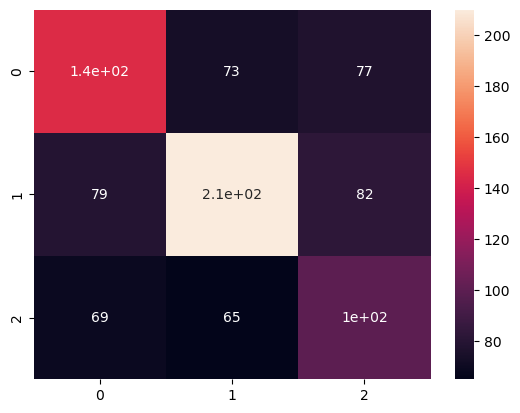

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier()
tree_model.fit(X = X_train, y = Y_train)
pred_tree = tree_model.predict(X = X_test)

cf_matrix = metrics.confusion_matrix(Y_test,pred_tree)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

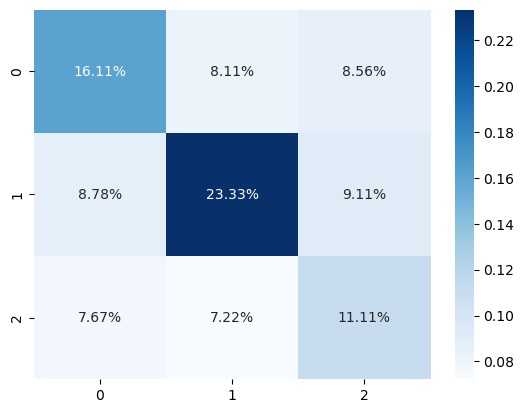

In [40]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

In [ ]:
metrics.accuracy_score(Y_test,pred_tree), metrics.cohen_kappa_score(Y_test,pred_tree)

# Now consider random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

target=LabelEncoder().fit_transform(Y_train)
parmeters={'n_estimators':[200, 300, 400], 'criterion':['gini','entropy'],
         'min_samples_split':[2,4], 'min_samples_leaf':[1,2,4]}
         
rand_model=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parmeters,scoring='accuracy', cv=5)

rand_model.fit(X = X_train, y = target)

In [ ]:
rand_model.best_estimator_

(0.5766666666666667, 0.3507821286167059)

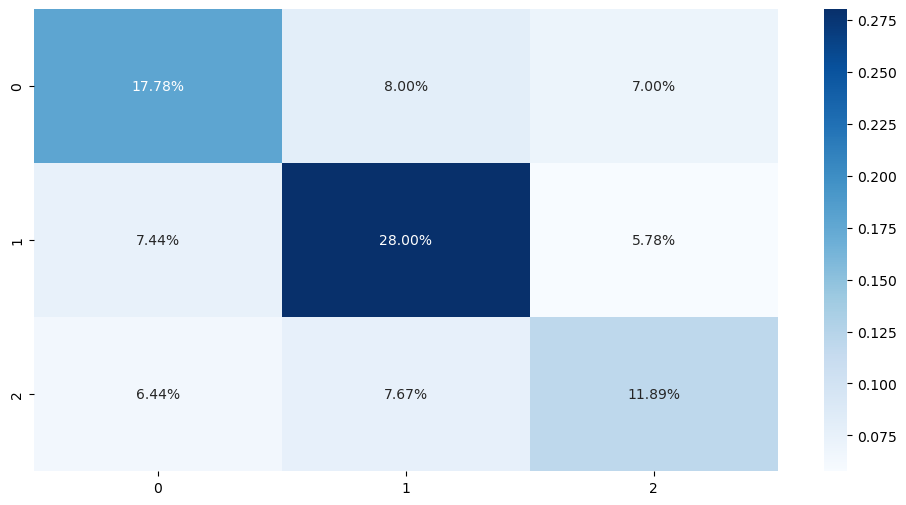

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rand_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_leaf_nodes=None,
            min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rand_model.fit(X = X_train, y = Y_train)
pred_rand = rand_model.predict(X = X_test)

cf_matrix = metrics.confusion_matrix(Y_test,pred_rand) 
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues') # Get two decimal places for % age
metrics.accuracy_score(Y_test,pred_rand), metrics.cohen_kappa_score(Y_test,pred_rand)

,features,importance
7,vehicle_type,0.021224
1,month,0.040445
0,week_day,0.073826
8,nr_of_stops,0.098244
2,day,0.114673
4,to,0.131721
3,from,0.139480
5,vehicle,0.155826
6,hour_minutes,0.224561


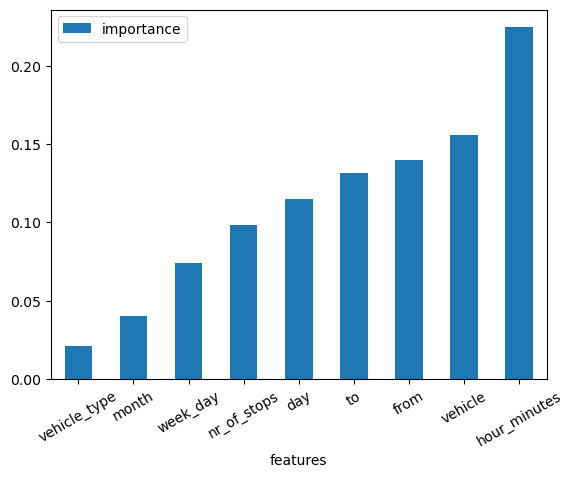

In [44]:
features=X_train.columns
f_imp=list(zip(X_train[features], rand_model.feature_importances_))
f_imp=pd.DataFrame(f_imp, columns=['features','importance'])
f_imp.sort_values(by = 'importance', inplace = True)

f_imp.plot.bar(x='features',y='importance')
plt.rcParams['figure.figsize']=12,6
plt.xticks(rotation=30)

f_imp

In [77]:
out = pd.DataFrame(Y_test)
out1 = pd.DataFrame(pred_rand, columns=['occupancy pred.'])
result = pd.concat([out, out1], axis=1, join="inner")
result.head(10)

,occupancy,occupancy pred.
574,high,low
649,low,medium
440,high,low
279,low,low
304,low,low
266,low,low
433,low,high
33,low,low
388,low,medium
883,medium,low


In [82]:
result.to_csv('out.csv') # As required in the submission